In [346]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [347]:
maxX = 100;
maxY = 100;
step = 1000000;

In [348]:
def getZ(x, y):
    return 1 + math.cos(0.003 * (x - 50) * (y - 50));

def generateSample(maxX, maxY):
    Sample = np.zeros((maxX, maxY));            
    for j in range(maxY):
        for i in range(maxX):
            newZ = int(getZ(i, j) * 10);
            Sample[i][j] = newZ;
    return Sample;

def getS(field):

    fieldSum = field.sum();
    field = field * (1 / fieldSum);

    result = 1
    for j in field:
        for i in j:
            result *= i ** i 
   
    return -math.log(result);

In [349]:
def createPlane(sample, field, SArray, xSArray):
    SampleSum = sample.sum();
    #sample = sample * (1 / SampleSum);
    
    fieldSum = field.sum();
    #field = field * (1 / fieldSum);

    fig = plt.figure(figsize=(12,9)); 
    ax_1 = fig.add_subplot(1, 2, 1);
    ax_2 = fig.add_subplot(1, 2, 2);
    ax_1.imshow(sample);
    img = ax_2.imshow(field);
    ax_1.set_title("Образец");
    ax_2.set_title("Поле");
    ax_1.text(50, 105, 'x', ha='center', va='center', fontsize='16');
    ax_2.text(50, 105, 'x', ha='center', va='center', fontsize='16');
    fig.text(0.1, 0.5, 'y', ha='center', va='center', rotation='vertical', fontsize='12');
    
    divider = make_axes_locatable(ax_2)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(img, cax=cax)

    fig1 = plt.figure(figsize=(12, 9));
    fig1.text(0.5, 0.1, 'N', ha='center', va='center');
    fig1.text(0.1, 0.5, 'Энтропия', ha='center', va='center', rotation='vertical');
    ax_3 = fig1.add_subplot(1, 1, 1);
    ax_3.plot(xSArray, SArray, linewidth = 2, color = (0, 0, 0));

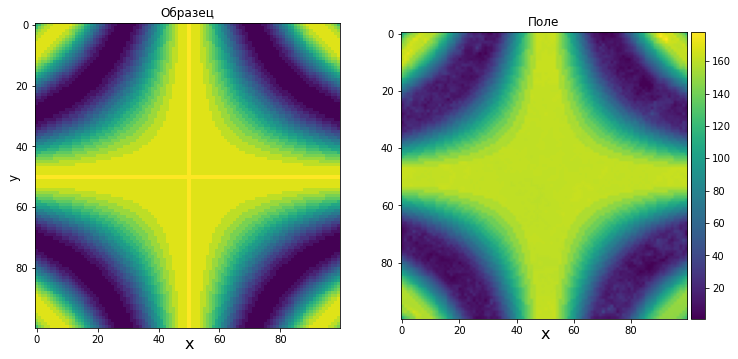

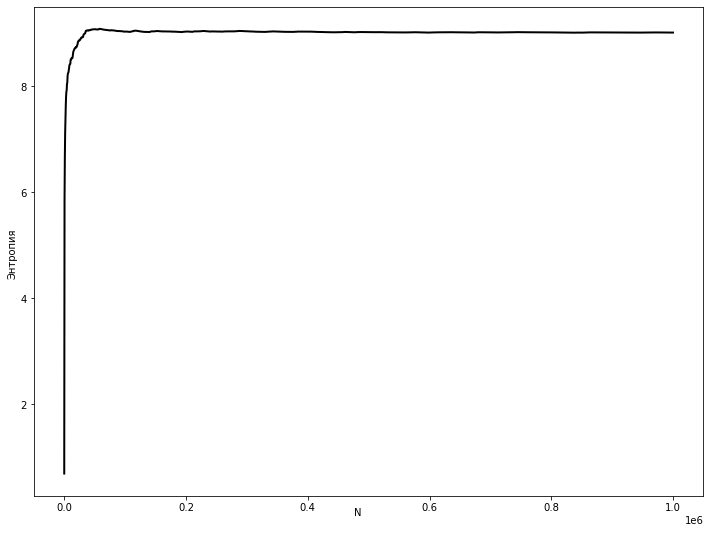

In [350]:
def main():
    sample = generateSample(maxX, maxY);
    sampleSum = sample.sum();

    currentPosition = np.array([random.randint(0, maxX - 1), random.randint(0, maxY - 1)]);
        
    field = np.zeros((maxX, maxY));
    field[currentPosition[0], currentPosition[1]] += 1;
    fieldSum = field.sum();

    xSArray = [];
    SArray = [];

    shiftList = np.array(
            [[0, 1], [1, 1], [1, 0], [1, -1],
             [0, -1], [-1, -1], [-1, 0], [-1, 1]]);
    shiftListIndex = [i for i in range(8)];

    for i in range(step):
        random.shuffle(shiftListIndex);
        currentH = float("inf");
        newPosition = currentPosition;

        for randomShift in shiftListIndex:
            tempPosition = currentPosition + shiftList[randomShift];
            
            expression = tempPosition[0] < 0 \
                or tempPosition[0] >= maxX \
                or tempPosition[1] < 0 \
                or tempPosition[1] >= maxY;
            if expression:
                continue;

            H1 = sample[tempPosition[0], tempPosition[1]] - sampleSum / (fieldSum + 1) * (field[tempPosition[0], tempPosition[1]] + 1);
            if H1 < 0 :
                H1 = 0;
            H2 = sample[tempPosition[0], tempPosition[1]] - sampleSum / fieldSum * (field[tempPosition[0], tempPosition[1]]);
            if H2 < 0 :
                H2 = 0;
            H = H1 - H2;
            if H < currentH:
                currentH = H;
                newPosition = tempPosition;

        currentPosition = newPosition;
        field[currentPosition[0], currentPosition[1]] += 1;
        fieldSum += 1;
        if i % 500 == 0:
            SArray.append(getS(field.copy()))
            xSArray.append(i)

    createPlane(sample, field, np.array(SArray), np.array(xSArray));

main();